# Lecture 5: Exploratory Data Analysis (EDA)

No se puede recorrer un camino sin un mapa o, al menos, sin saber cómo es el terreno que recorreremos. Hacerlo puede llevarnos a perdernos. Lo mismo ocurre con los datos: necesitamos explorarlos para conocer por dónde abordarlos. Para ello realizaremos algo llamado el **Análisis Exploratorio de Datos** (_Exploratory Data Analysis - EDA_), el cual es una exploración de los datos para conocer cómo se comportan, cuál es su calidad, con qué cantidad de información contamos e, incluso, formular hipótesis iniciales, entre otras cosas.

Esta etapa del análisis de datos permite obtener hallazgos importantes que pueden ser útiles desde el principio para nosotros, nuestros clientes o para incluirlo en el producto final. Así mismo, esta etapa permite obtener información que puede servir para la afinación de modelos de _Machine Learning_, Data Visualization (DataViz) y desplegamiento para la producción, entre otros.

Por tanto, en esta clase realizaremos el primer acercamiento a los datos para entender la lógica detrás del análisis. Empecemos por lo primero: cargando los datos:

# 1. Data Input

Para cargar los datos, debemos entender primero qué tipo de datos tenemos: `.xls`, `.xlsx`, `.csv`, `.dta`, `.RData`, `.txt`. A partir de ello, utilizaremos la función apropiada para cargar nuestros datos. En este caso, utilizaremos los datos de alquiler de AirBNB de Nueva York, el cual cuenta con un gran número de variables que nos ayudará a entender bien el comportamiento del alquiler de este tipo de inmuebles en la ciudad. 

Como podemos observar en la carpeta donde están guardados los datos, este es un archivo `.csv` (comma-separated values). Este es un archivo de común uso por su familiaridad con Excel y un menor uso de espacio en disco. Utilizaremos la librería `pandas` para cargar los datos en Python: 

In [2]:
# Importamos la librería
import pandas as pd

# Importamos los datos
listings = pd.read_csv('datain/airbnb_nyc.csv', delimiter=',')

Siempre es conveniente revisar cómo se cargaron los datos, ya que en ocasiones habrá inconvenientes: habrán filas vacías, columnas adicionales, todos los valores quedan en una sola columna, entre otros. Por tanto, vamos a analizar las primeras 10 filas del archivo con el método `head()`:

In [3]:
listings.head(10)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
5,11943,Country space in the city,NaN,Ditmas Park. Entire 3rd floor. 2 large rooms ...,none,NaN,NaN,"No smoking, no cooking on 3rd floor",45445,40098.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,12299,Beautiful Sunny Park Slope Brooklyn,NaN,This is a large one bedroom apartment located ...,none,NaN,NaN,NaN,47610,40108.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
7,12627,Entire apartment in central Brooklyn neighborh...,My place is close to Prospect Park and you’ll...,My place is close to Prospect Park and you’ll...,none,"Steps from Beautiful Prospect Park, Zoo, Brook...","NYC Subway lines Q, B, and S to Prospect Park....",NaN,49670,40115.0,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
8,13050,bright and stylish duplex,"Wonderfully bright, comfortable, and stylish, ...","Wonderfully bright, comfortable, and stylish, ...",none,The Putnam-Throop area of Bed-Stuy is a vibran...,"Three useful buses (26, 52, 43) are three or f...","Absolutely, positively NO smoking, either insi...",50846,40119.0,...,-1,1,-1,-1,-1,1,-1,-1,-1,-1
9,14322,Beautiful Apartment in Manhattan!!!,"You will find a welcoming apartment, I love to...","You will find a welcoming apartment, I love to...",none,"They are very private, so please respect their...","You have trains N/R/6 and buses(on 2av, 3ave 2...",Cleaning fee is required. NO SHOES USED IN THE...,56284,40138.0,...,1,1,-1,1,-1,-1,-1,-1,-1,-1


Nos topamos con un inconveniente: al parecer no nos deja ver todas las columnas. Revisemos cuántas y cuáles columnas tenemos con el método `columns` (sin paréntesis):

In [4]:
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


Notebook protege de alguna manera que los `dataframe` muestre al tiempo todas sus columnas y todas sus filas, ya que podría ser incómodo para quien está analizando los datos. Por ello, debemos cambiarle la configuración de manera temporal para que nos permita observar todas las columnas. Ello lo realizaremos con las opciones de pandas `pd.options.display.max_columns`:

In [5]:
# Cambiando la preferencia de máxima cantidad de columnas mostradas
pd.options.display.max_columns = 100

# Viendo nuevamente la base de dats
listings.head(10)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.00,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.00,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.00,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,1.00,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,

---------------------------------------------

### Ejercicio:

Ahora sí, ¿qué estamos viendo en los datos?

-------------------------------------------------------

# 2. Análisis de la calidad de los datos

El mundo de los datos en pocas ocasiones va a tener bases de datos perfectas: sin valores perdidos (_missings_), con un gran número de observaciones, sin error gramaticales y con estandarización de los valores. A lo sumo, estas las encontrarán en las bases de datos de entrenamiento que utilizaremos aquí o en entidades que ya tienen experiencia en el procesamiento de datos. No obstante, por lo general primero debemos analizar la calidad de los datos que tenemos. Esto incluye saber la cantidad de datos, los valores únicos, los valores perdidos, entre otros.

A continuación, realizaremos una breve introducción a esta etapa de revisión de la calidad de los datos (¡esto podría ser una clase entera!), lo cual les entregará herramientas y algoritmos suficientes para afrontar problemas básicos. Más allá, les empezará a entregar una estructura analítica para solucionar problemas.

## 2.1. Cantidad de datos

En primer lugar, analizaremos cuántos datos tenemos. Esto lo logramos por medio del método `shape`, el cual nos entrega en la primera posición las filas y en la segunda posición las columnas:

In [7]:
# Shape en una versión básica
listings.shape

(30179, 81)

Podemos ser un poco más estéticos y escribir la siguiente línea de código:

In [9]:
# Shape en una versión un poco más estética
print("Número de filas: ", listings.shape[0], "\nNúmero de columnas: ", listings.shape[1])

Número de filas:  30179 
Número de columnas:  81


> **Pregunta:** ¿considera que tenemos un buen número de observaciones y columnas?

Ahora podemos echar un vistazo a la base de datos, observando las primeras 10 observaciones del `dataframe` por medio del método `head()` (o a las últimas 10 observaciones con el método `tail()`):

In [11]:
# Observación de las primeras 10 observaciones
listings.head()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,1.0,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,20,4

Puede resultar un poco engorroso observar las columnas que tenemos de esta manera, por lo cual podemos obtener la lista de los nombres de las columnas por medio del método `columns`:

In [10]:
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


## 2.2. Valores perdidos (missings)

Revisemos en la base de datos que tenemos cómo es la calidad de los datos respecto a la completitud de los datos. Nos debemos hacer las siguientes preguntas:

* ¿Cuántos missings hay?
* ¿En cuáles variables hay missings?
* ¿Afectan o no el análisis que realizaremos?
* ¿Debemos tomar alguna decisión al respecto: eliminar o imputar?

En ese sentido, podemos observar el número de valores perdidos (_missings_) por medio del método `isnull()`, el cual clasifica con valores booleanos si la celda tiene un valor perdido o no. Veamos cómo se observa esto:

In [13]:
# Clasificación de los valores perdidos
listings.isnull()

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,False,False,

Tenemos una clasificación de los valores perdidos, pero este formato no nos sirve para mucho: no nos resume la información para saber cuáles columnas presentan pérdida de información y a qué nivel lo tiene. Sin embargo, existe un dato curioso sobre los valores booleanos:

> **Nota:** Python asigna el valor de 1 al `True` en los valores booleanos y 0 al `False`.

Por tanto, podemos contar o sumar el número de valores perdidos, ya que `isnull()` convierte los valores perdidos en `True`. En ese sentido, si aplicamos una operación de suma, con el método `sum()`, podremos encontrar el número de valores perdidos por columna en nuestra base de datos. Probémoslo:

In [14]:
# Cambiando la visualización de 100 filas
pd.set_option('display.max_rows', 100)

# Conteo de los valores perdidos
listings.isnull().sum()

id                                                  0
name                                               13
summary                                          1218
description                                       604
experiences_offered                                 0
neighborhood_overview                           12066
transit                                         11989
house_rules                                     13556
host_id                                             0
host_since                                          9
host_response_time                              13097
host_response_rate                              13097
host_is_superhost                                   9
host_listings_count                                 9
host_identity_verified                              9
street                                              0
neighbourhood                                       9
latitude                                            0
longitude                   

Ahora podemos visualizar el número de valores perdidos por cada una de las columnas de nuestra base de datos. De acuerdo con ello, encontramos que hay varias columnas con ninguna pérdida de datos (valores con 0) y otras que presentan alto grado de pérdida de datos (como `host_response_time` que tiene un 43,39% de datos perdidos). Más adelante sabremos qué hacer con esto, pero, por ahora, dejémoslo así.

## 2.3. Valores únicos

A la vez, es necesario saber cuántos valores únicos tenemos en una base de datos. Un valor único es aquel que representa los diferentes valores que toma una columna o variable de una base de datos. Es decir, es el número, texto, categoría, entre otros, que indica que esa variable o columna presenta ese valor en la base de datos, ya sea una vez o varias. 

Resulta importante analizar cuántos valores únicos tenemos dado que en ocasiones **puede ayudarnos a identificar errores o typos** en los datos. Así podremos corregirlos. Para observar el número de valores únicos en una base de datos de manera resumida utilizamos el método `nunique()`:

In [15]:
listings.nunique()

id                                              30179
name                                            29611
summary                                         27125
description                                     28382
experiences_offered                                 1
neighborhood_overview                           15676
transit                                         16234
house_rules                                     13892
host_id                                         24396
host_since                                       3417
host_response_time                                  4
host_response_rate                                 78
host_is_superhost                                   2
host_listings_count                                69
host_identity_verified                              2
street                                            214
neighbourhood                                     186
latitude                                        15468
longitude                   

Ahora observemos el caso de `review_scores_checkin`: si bien es una variable que podría tomar del 1 al 10, tiene 9 valores únicos. ¿Es esto normal? Analicemos los valores únicos que toma esa columna con el método `unique()`:

In [17]:
listings.review_scores_checkin.unique()

array([10., nan,  9.,  6.,  8.,  7.,  2.,  4.,  5.])

Al parecer todo está bien. Lo que ocurre, según podemos observar, es que nadie puntuó a las residencias con un 1 o 3 de calificación. Esto es un hallazgo que nos puede entregar información a nuestros clientes: ¿por qué los usuarios no calificaron con un 1 o un 3 a los checkin de los lugares? ¿Tiene que ver con un comportamiento de los usuarios o es que ningún checkin es tan malo?

---------------------------------------------

#### Ejercicio

Ahora observemos la variable `street`:
1. Escriba un código que muestre los valores únicos de la variable `street`.
2. Responda: ¿encuentra algún comportamiento particular de los valores que toma?

Analice la variable `street` respecto a sus valores únicos. ¿Observa algo extraño?

------------------------------------------------------------

## 2.4. Tipos de las variables

Como habíamos anotado antes, resulta importante observar el tipo de variables que manejamos. En ocasiones, podemos encontrar variables que se cargan con un tipo de dato que no le corresponde. Normalmente esto ocurre con los números y los formatos de fecha, los cuales comúnmente son confundidos con texto (tipo `object` por lo general). En ese sentido, nos interesa revisar los tipos de las columnas de la base de datos con el método `dtypes`:

In [18]:
listings.dtypes

id                                                int64
name                                             object
summary                                          object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
transit                                          object
house_rules                                      object
host_id                                           int64
host_since                                      float64
host_response_time                               object
host_response_rate                              float64
host_is_superhost                               float64
host_listings_count                             float64
host_identity_verified                          float64
street                                           object
neighbourhood                                    object
latitude                                        

El tipo `float64` es para números, por lo cual tenemos el tipo correcto para `sales`. El tipo `object` es un objeto genérico que normalmente se le asigna a los tipos `str`, por lo cual no hay problemas para aquellos que son caracteres o textos. 

Esta es una base de datos bien comportada. Al parecer, todas las variables tienen el tipo que necesitamos. Sin embargo, más adelante veremos cuáles elementos debemos cambiar.

Por ahora, veamos uno que _parcialmente_ está erróneo. Veamos el caso de la variable `smoking_allowed`:

In [13]:
listings.smoking_allowed.unique()

array([-1,  1], dtype=int64)

Al parecer solo tiene dos valores únicos, ¿eso qué significa?

----------------------------------------------------------

### Ejercicio:

Convierta la variable `smoking_allowed` en una variable categórica con los dos niveles observados:

# 3. Análisis univariado:

Resulta importante para constuir modelos y generar conclusiones saber cómo se comportan nuestras variables. Por ejemplo, algunos modelos inferenciales no funcionan si los datos no tienen una distribución normal o una distribución definida. Al mismo tiempo, conocer los datos nos ayuda a comprender cómo se comporta el fenómeno que estamos analizando.

En ese sentido, hay dos tipos de análisis: análisis univariado y análisis multivariado. El análisis univariado es el análisis de una variable a la vez, en la cual podemos entender cómo se comporta, qué datos atípicos tiene, entre otros. El análisis multivariado es el análisis de varias variables al tiempo, centrado especialmente en las correlaciones, agrupaciones, entre otros.

Empecemos con una introducción al análisis univariado, el cual puede ser tan amplio como se desee. Estos son algunos puntos sugeridos para empezar.

## 3.1. Distribución de los datos

Observar la distribución de los datos nos ayuda a entender cómo se comportan. En algunos casos, esto nos ayuda a ver si existen algunos datos que están por encima de otros o si hay algún tipo de sesgo en la distribución que pueda atentar contra los supuestos de los modelos. Así mismo, podemos observar si hay patrones de comportamiento o si hay datos atípicos.

Realicemos un análisis del precio (variable `price`) por medio de la librería `matplotlib`:

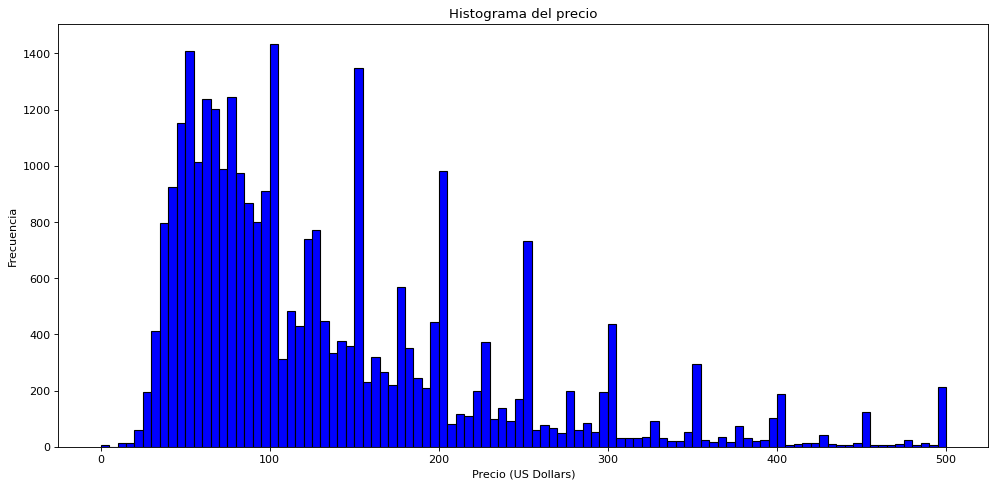

In [22]:
# Importando la librería matplotlib
import matplotlib.pyplot as plt

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Generando la gráfica
plt.hist(listings['price'], color = 'blue', edgecolor = 'black',\
        bins = int(500/5)) # Gráfica

# Añadiendo elementos
plt.title('Histograma del precio') # Título de la gráfica
plt.xlabel('Precio (US Dollars)') # Título del eje x
plt.ylabel('Frecuencia') # Título del eje y

plt.show() # Se muestra la gráfica

¿Qué pueden observar particular en el comportamiento de los precios? ¿Existen algunas conclusiones acerca de cómo se ofrecen y rentan los espacios? ¿Qué nos dice esto del comportamiento de los arrendadores y arrendatarios?


> **¡Recomendación!** Cuando se hagan gráficas, siempre intenten decir algo de ellas. **No es suficiente solo graficar, sino contextualizarlo y dar a entender su intención**.

Por ello, vamos a hacernos unas preguntas:

1. ¿La distribución es suave o tiene picos o comportamiento discontinuo"? ¿Por qué?
2. ¿Se pueden detectar valores atípicos (_outliers_) en los datos? Si sí, ¿qué cree que son? Si no, ¿por qué?

También podemos analizar los datos con una tabla. Analicemos la variable `bedrooms` con este método:

In [26]:
# Contamos el número de observaciones para cada número de cuartos
listings[["bedrooms", "id"]].groupby("bedrooms").count()

,id
bedrooms,
1,24254
2,4321
3,1241
4,279
5,62
6,14
7,4
8,3
11,1


Esta tabla se puede utilizar para aquellas categorías con pocos valores únicos, ya que resulta más fácil de analizar. Sin embargo, resulta aún más fácil de analizar con una imagen. En ese sentido, podemos traducir esta tabla en una gráfica de la siguiente manera:

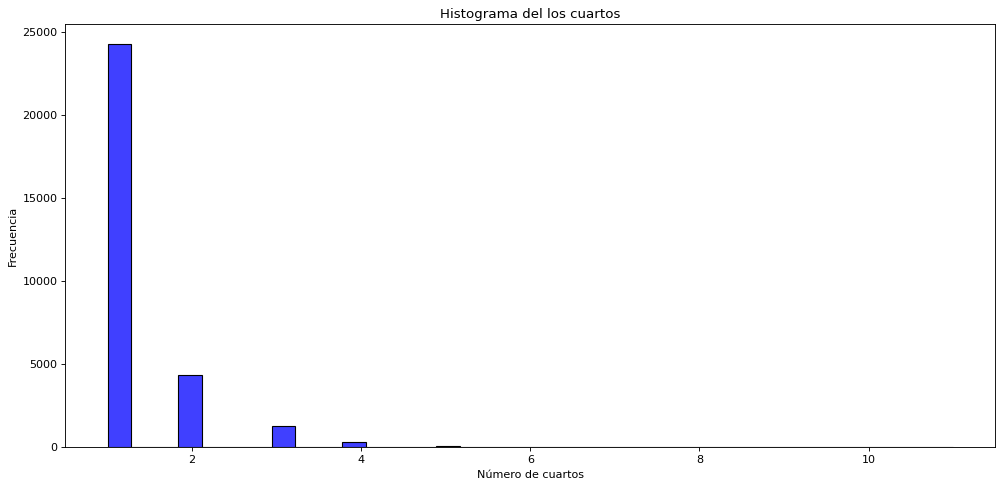

In [27]:
# Importando la librería seaborn
import seaborn as sns

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Generando la gráfica
sns.histplot(listings['bedrooms'],
             kde = False, 
             bins = int(180/5), color = 'blue')

# Añadiendo elementos
plt.title('Histograma del los cuartos') # Título de la gráfica
plt.xlabel('Número de cuartos') # Título del eje x
plt.ylabel('Frecuencia') # Título del eje y

plt.show() # Se muestra la gráfica

-----------------------------------------------------

### Ejercicio:

Utilice cualquier método para graficar las variables `price`, `bedrooms`, `bathrooms` y `number_of_reviews`:

------------------------------------------------------

## 3.2. Análisis descriptivo de los datos

El **análisis univariado** es el análisis de una sola variable. Es decir, el comportamiento por sí mismo. Varias elementos se pueden analizar: estadística descriptiva (media, moda, mediana), comportamiento a lo largo del tiempo (tendencias históricas), comportamiento de su distribución, entre otros.

Ya hemos visto un poco de distribución de variables en gráficos, pero ahora vamos a ver qué otras opciones tenemos para explorar los datos. En este caso, vamos a verlas un poco más cuantitativamente.

En primer lugar, vamos a ver el método `describe()`, el cual nos entrega información estadística básica de aquellas variables que son numéricas. Lo podemos ver en el siguiente código:

In [19]:
# Descripción de los datos numéricos
listings.describe()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,accessible,event_suitable
count,3.017900e+04,3.017900e+04,30170.000000,17082.000000,30170.000000,30170.000000,30170.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.0,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,21094.000000,21068.000000,21078.000000,21050.000000,21069.000000,21047.000000,21049.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,21919.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000,30179.00000,30179.000000,30179.000000,30179.000000,30179.000000,30179.000000
mean,2.088031e+07,7.238659e+07,42160.939211,0.913360,0.083560,16.073285,0.487305,40.728593,-73.952292,2.723781,1.151595,1.265516,1.527287,132.949965,1.427416,12.620365,6.283740,1.0,6.199742,14.895325,24.232446,94.362040,4.459889,2.456145,93.643975,9.567543,9.192049,9.694252,9.713275,9.553476,9.369851,0.358461,7.956128,6.117897,1.703801,0.134431,0.797324,-0.857782,0.652540,-0.984956,-0.936777,-0.898075,-0.984294,-0.550615,-0.836376,0.331654,-0.635574,-0.577918,-0.070082,-0.414626,-0.792770,-0.524570,-0.394877,-0.914046,-0.714040,-0.902316,0.951887,-0.693893,-0.64134,-0.681898,-0.850028,-0.648696,-0.876470,-0.937838
std,1.090207e+07,8.296663e+07,841.819786,0.190183,0.276731,91.709777,0.499847,0.054541,0.044117,1.700634,0.422225,0.614659,0.997217,93.151824,1.029999,23.073653,8.849725,0.0,9.980716,20.874474,32.340404,129.373759,5.265633,4.133615,10.155133,0.970806,1.248211,0.834611,0.838397,0.854678,1.040004,0.479556,35.468893,34.475557,6.823070,1.096594,1.205727,0.514022,0.757767,0.172806,0.349932,0.439850,0.176542,0.834773,0.548165,0.943417,0.772052,0.816108,0.997558,0.910007,0.609531,0.851381,0.918749,0.405617,0.700117,0.431082,0.306454,0.720090,0.76727,0.731459,0.526746,0.761060,0.481464,0.347080
min,2.539000e+03,2.787000e+03,39698.000000,0.000000,0.000000,0.000000,0.000000,40.499790,-74.244420,1.000000,0.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.127817e+07,9.165996e+06,41552.000000,0.910000,0.000000,1.000000,0.000000,40.690720,-73.982085,2.000000,1.000000,1.000000,1.000000,65.000000,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.0

Ahora, también podemos escoger algunos de ellos en los que quisiéramos hacer un análisis más profundo:

In [20]:
# Describe para algunas variables
listings[['price','bedrooms','bathrooms','number_of_reviews']].describe()

,price,bedrooms,bathrooms,number_of_reviews
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889
std,93.151824,0.614659,0.422225,5.265633
min,0.000000,1.000000,0.500000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,2.000000
75%,175.000000,1.000000,1.000000,7.000000
max,500.000000,11.000000,7.500000,20.000000


Si deseamos obtener este valor por separado, podemos utilizar los métodos `min()`, `max()`, `mean()` y `median()` para obtenerlos. Construyamos algunos ejemplos:

In [33]:
import statistics

# Mínimo
print("Mínimo del precio: ", min(listings["price"]))

# Máximo
print("Máximo del precio: ", max(listings["price"]))

# Media o promedio
print("Promedio del precio: ", statistics.mean(listings["price"]))

# Mediana o percentil 50
print("Mediana del precio: ", statistics.median(listings["price"]))

Mínimo del precio:  0
Máximo del precio:  500
Promedio del precio:  132.9499652075947
Mediana del precio:  100


> **Nota estadística:** En ocasiones, la media no es representativa para una distribución de los datos, como se puede observar en el caso del precio. En ese sentido, se utilizan otros métodos de análisis: análisis de mediana, Wilcoxon-Manney-XXX Test (Rank Sum Test), entre otros.

También podemos ver los percentiles con el método `quantile()`, si es el caso que quisiéramos ver percentiles diferentes a los mostrados por `describe()`:

In [21]:
# Percentiles 90, 95 y 99 del precio
listings["price"].quantile([0.9, 0.95, 0.99])

0.90    250.0
0.95    325.0
0.99    450.0
Name: price, dtype: float64

## 3.3. Pruebas de inferencia univariada

Tener una hipótesis sobre algo no es suficiente para creer que es cierta. Por ejemplo, podemos pensar que el precio de los lugares con un cuarto compartido (`Shared room` en la variable `room_type`) debe ser menor a los lugares con un cuarto privado (`Private room` en la misma variable). No obstante, dicha hipótesis debe probarse de manera formal para tener evidencia sobre su certeza. Por ello, debemos plantear una hipótesis y una prueba.

En ese sentido, podemos establecer la siguiente prueba de hipótesis:

$$ H_0 : P_{Shared} = P_{Private} $$
$$ H_1 : P_{Shared} \neq P_{Private} $$

Donde $P_{Shared}$ es el precio de los lugares con cuarto compartido y $P_{Private}$ es el precio de los lugares con cuarto privado. Por tanto, la hipótesis nula consiste en que el precio de los lugares con cuarto compartido es igual al precio de los lugares con cuarto privado y la hipótesis alternativa es que son diferentes.

Planteemos varias pruebas formales:

### 3.3.1. Diferencia de medias

La diferencia de medias es una prueba inferencial que permite establecer bajo un nivel de confianza definido si dos medias de dos poblaciones o muestras diferentes son diferentes. Esta prueba requiere de un supuesto de distribución normal. Para ello utilizaremos la función `ttest_ind` de la librería `scipy`.

In [36]:
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [41]:
# Importamos las librerías
import numpy as np
from scipy import stats

# Construimos los dos grupos tomando solamente el precio
shared = listings[listings["room_type"] == "Shared room"]["price"]
private = listings[listings["room_type"] == "Private room"]["price"]

# Realizamos la prueba
stats.ttest_ind(shared, private)

Ttest_indResult(statistic=-8.649715557721624, pvalue=5.648160888947877e-18)

Observemos los resultados y preguntémonos: ¿existe una diferencia de los precios de cada grupo? Si sí, ¿bajo que nivel de significancia? Si no, ¿por qué sabemos que no?

### 3.3.2. Prueba de Suma de Rangos de Wilcoxon

No obstante, habíamos comentado que esta prueba necesita una distribución normal para ser válida, cosa que no probamos. En ese sentido, revisemos si la prueba fue válida ante los supuestos que necesita realizando una prueba de normalidad Shapiro-Wilk con la función `shapiro()` de la librería `scipy`:

In [47]:
from scipy.stats import shapiro

# Shared room
stat, p = shapiro(shared)

if p > 0.05:
    print("Shared room price probably is normal.")
else:
    print("Shared room price probably is not normal.")

# Private room
stat, p = shapiro(private)

if p > 0.05:
    print("Private room price probably is normal.")
else:
    print("Private room price probably is not normal.")


Shared room price probably is not normal.
Private room price probably is not normal.


Como podemos observar, el precio de ambos tipos de cuartos no es normal. Por tanto, la prueba t de diferencia de medias no fue válida. En ese sentido, podemos utilizar una prueba que no requiere de este tipo de supuestos como la Prueba de Suma de Rangos de Wilcoxon (_Wilcoxon Rank Sum Test_). Esta metodología no estipula si la media es diferente, sino que la distribución de ambos precios es diferente (que es lo que al final deseamos probar).


Este procedimiento lo realizaremos con la función `ranksums()` de la librería `scipy`:

In [48]:
# Importando las librerías
import numpy as np
from scipy.stats import ranksums

# Prueba de Wilcoxom
ranksums(shared, private)

RanksumsResult(statistic=-18.396227757184423, pvalue=1.4083428980597724e-75)

Dado que el p-valor es menor a 0.5, podemos afirmar que existe evidencia suficiente para estipular que las dos distribuciones del precio son diferentes. Los anteriores análisis son válidos, a pesar que la prueba anterior era errónea.

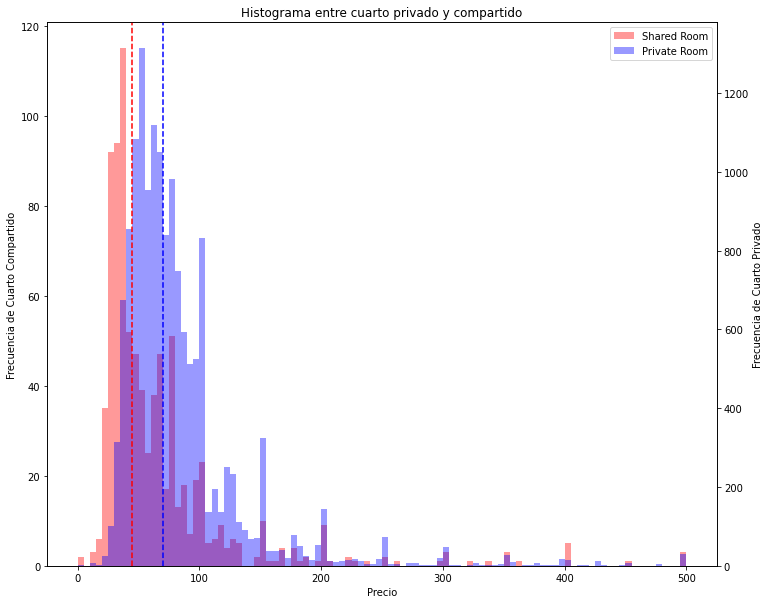

In [76]:
# Se importan las librerías 
import matplotlib.pyplot as plt

# Se crean los subplots para doble eje
fig, ax1 = plt.subplots(figsize=(12,10))

# Se voltea el segundo eje
ax2 = ax1.twinx()

# Gráfica de shared rooms
ax1.hist(listings[listings["room_type"] == "Shared room"]["price"],\
         bins = 100, alpha = 0.4, color = "red", label = "Shared Room")

# Gráfica de private rooms
ax2.hist(listings[listings["room_type"] == "Private room"]["price"],\
         bins = 100, alpha = 0.4, color = "blue", label = "Private Room")

# Vertical line of the median
plt.axvline(x = statistics.median(listings[listings["room_type"] == "Shared room"]["price"]),\
            color = 'red', linestyle = "dashed")
plt.axvline(x = statistics.median(listings[listings["room_type"] == "Private room"]["price"]),\
            color = 'blue', linestyle = "dashed")

# Título de la gráfica
plt.title("Histograma entre cuarto privado y compartido")

# Leyenda
fig.legend(loc = "upper right", bbox_to_anchor = (1,1), bbox_transform = ax1.transAxes)

# Título del eje x e y
ax1.set_xlabel('Precio')
ax1.set_ylabel('Frecuencia de Cuarto Compartido')
ax2.set_ylabel('Frecuencia de Cuarto Privado')

# Se muestra la gráfica
plt.show()

Este análisis incluso nos da otra teoría a probar: el precio de los cuartos privados puede ser mayor que el precio de los cuartos compartidos. La función `ranksums()` nos permite probar esta hipótesis con la opción `'greater'` o `'less'` en los parámetros. Realicemos la prueba:

In [84]:
# Importando las librerías
import numpy as np
from scipy.stats import ranksums

# Prueba de Wilcoxom
ranksums(shared, private, alternative = "less")

RanksumsResult(statistic=-18.396227757184423, pvalue=7.041714490298862e-76)

El p-valor de la prueba nos otorga evidencia suficiente para asegurar que los precios de los cuartos compartidos son menores que los precios de los cuartos privados. Realicemos la prueba al revés para saber qué ocurre:

# 4. Análisis multivariado:

El **análisis multivariado** es el análisis de varias variables al tiempo de forma simultánea. Es decir, es un análisis de cómo se comportan las variable teniendo en cuenta que al mismo tiempo otras las afectan. Este tipo de análisis tiene diferente métodos, entre los cuales se encuentra el análisis de la distribución conjunta, sus correlaciones, la construcción de regresiones, entre otras.

En este caso vamos a realizar una pequeña introducción de algunas de las más importantes.

## 4.1. Distribución conjunta

Las distribución conjunta se pregunta sobre cómo se ubican las observaciones ante la variación de dos o más variables. Este tipo de análisis permite encontrar diferentes hallazgos, como la conformación de grupos o clusters, comportamiento atípicos, entre otros.

En este caso, analizaremos cómo se comporta el precio (`price`) respecto a los cuartos (`bedrooms`) que tiene la propiedad.

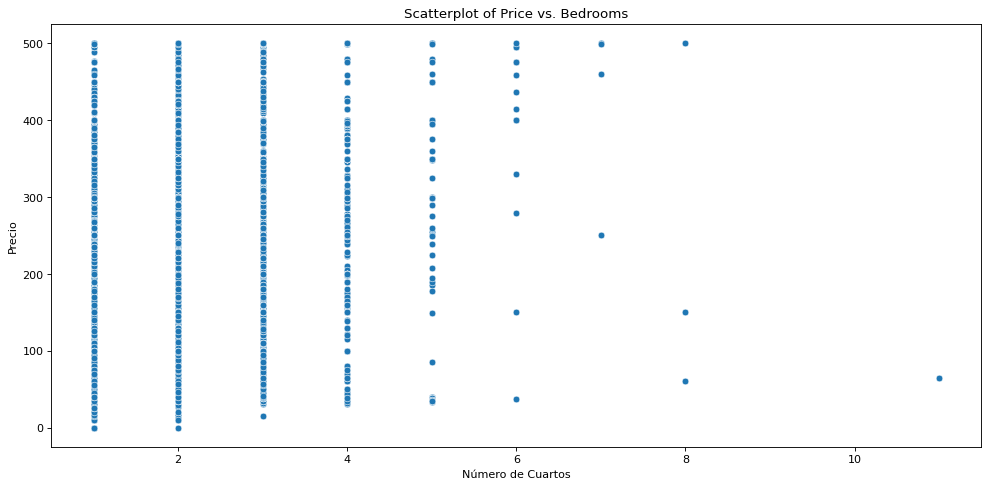

In [80]:
# Importamos la librería que se necesita
import seaborn as sns

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Gráfico de densidad por puntos
sns.scatterplot(x = 'bedrooms', y = 'price', data = listings)

# Cambiamos el nombre de los ejes X e Y
plt.ylabel("Precio"); plt.xlabel("Número de Cuartos")

# Estipulamos el título
plt.title("Scatterplot of Price vs. Bedrooms")

# Mostramos la gráfica
plt.show()

Al parecer este tipo de gráfica no nos sirve mucho: no nos cuenta una historia completa. Si bien nos muestra algo (existe una reducción a partir del número de los datos), no es suficientemente claro. Utilicemos otro tipo de visualización: el diagrama de cajas y bigotes o _boxplot_.

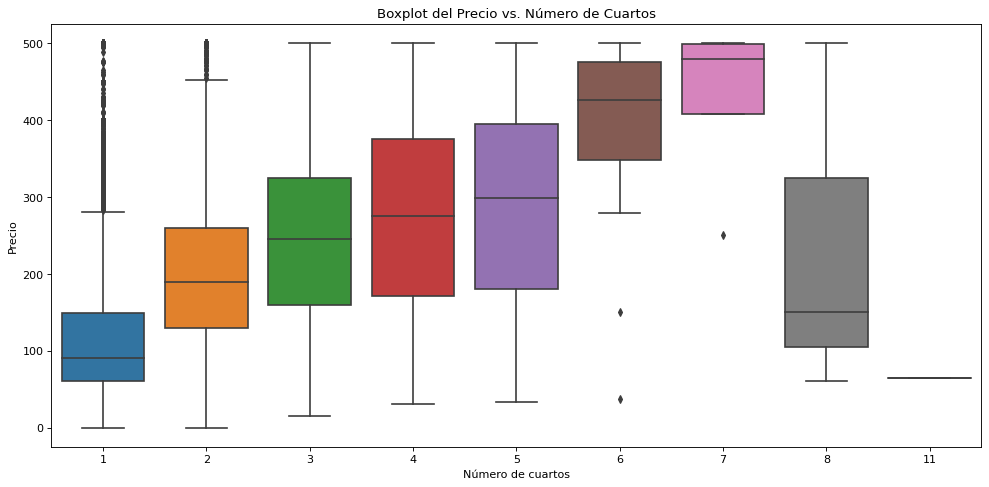

In [86]:
# Tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Boxplot
sns.boxplot(x = 'bedrooms', y = 'price', data = listings) # Se genera la gráfica: boxplot

# Cambio de los títulos de los ejes X e Y
plt.ylabel("Precio"); plt.xlabel("Número de cuartos") # Eje Y y X

# Cambio del título de la gráfica
plt.title("Boxplot del Precio vs. Número de Cuartos") # Título de la gráfica

# Se muestra la gráfica
plt.show()

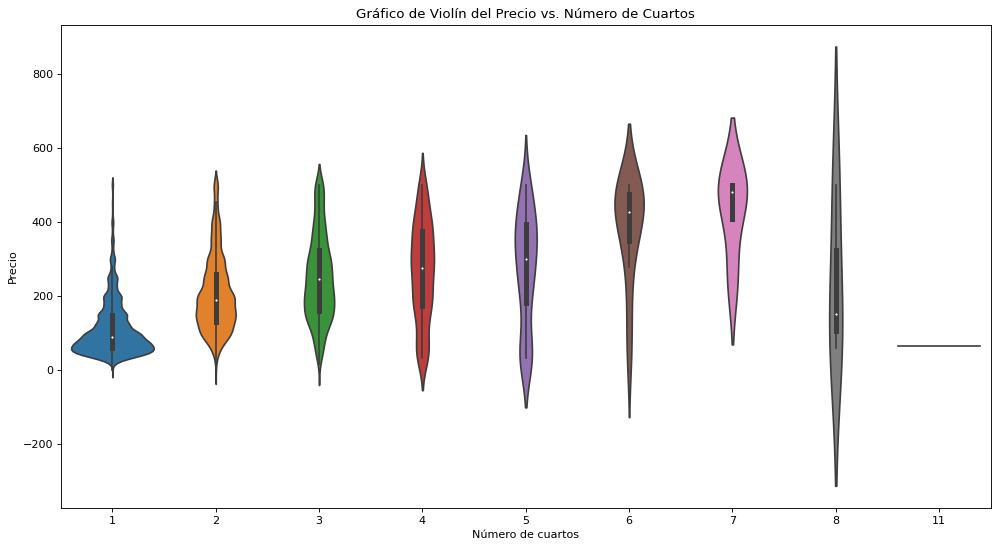

In [88]:
# Tamaño de la gráfica
plt.figure(figsize=(15,8), dpi = 80) 

# Violin Plot
sns.violinplot(x = 'bedrooms', y = 'price', data = listings) 

# Eje X e Y
plt.ylabel("Precio"); plt.xlabel("Número de cuartos")

# Título de la gráfica
plt.title("Gráfico de Violín del Precio vs. Número de Cuartos")

# Se muestra la gráfica
plt.show()

In [25]:
listings[["bedrooms", "id"]].groupby("bedrooms").count()

,id
bedrooms,
1,24254
2,4321
3,1241
4,279
5,62
6,14
7,4
8,3
11,1


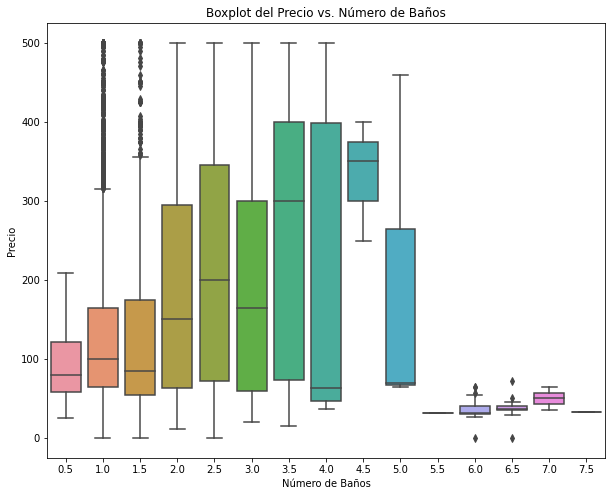

In [26]:
# Boxplot
plt.figure(figsize = (10,8)) # Tamaño de la gráfica
sns.boxplot(x = 'bathrooms', y = 'price', data = listings) # Se genera la gráfica
plt.ylabel("Precio"); plt.xlabel("Número de Baños") # Ejes X y Y
plt.title("Boxplot del Precio vs. Número de Baños") # Título
plt.show()

### Pequeño ejercicio:

#### A. ¿Qué nos dicen estas gráficas?

B. Obtenga el boxplot entre la variable de `price` y el `guest_included`. Analice los resultados.

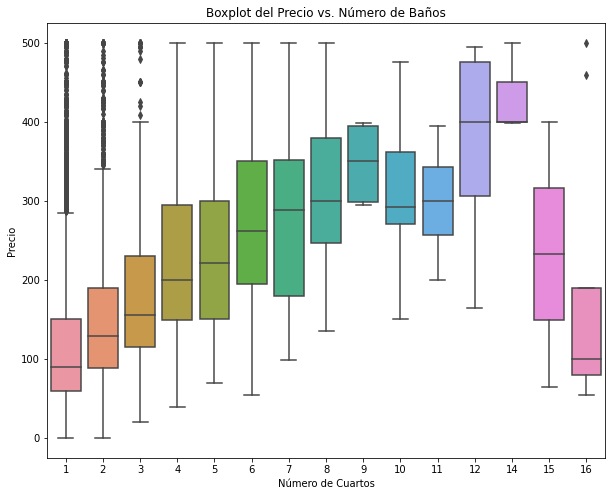

In [27]:
# Boxplot
plt.figure(figsize = (10,8)) # Tamaño de la gráfica
sns.boxplot(x = 'guests_included', y = 'price', data = listings) # Se genera la gráfica
plt.ylabel("Precio"); plt.xlabel("Número de Cuartos") # Ejes X y Y
plt.title("Boxplot del Precio vs. Número de Baños") # Título
plt.show()

## 6.4.1. Correlación

> **Nota:** correlación no implica causalidad.

La correlación es una medida que captura la **relación lineal** entre dos variables. Es decir, cuánto cambia una variable si otra cambia al tiempo. En ese sentido, la escala de la correlación va desde -1 a 1, tal que:

* **Si la correlación es 1, existe una relación positiva perfecta:** 
    - Si la variable cambia positivamente 1 punto, la otra también cambia positivamente 1 punto. Por ejemplo, que un cuarto adicional sube el precio.
    - Si la variable cambia negativamente 1 punto, la otra también cambia negativamente 1 punto. Por ejemplo, que un cuarto menos baja el precio.
* **Si la correlación es -1, exista una relación negativa perfecta:** 
    - Si la variable cambia positivamente 1 punto, la otra cambia negativamente 1 punto. Por ejemplo, un mayor crimen alrededor de la propiedad baja el precio.
    - Si la variable cambia negativamente 1 punto, la otra cambia positivamente 1 punto. Por ejemplo, un menor crimen alrededor de la propiedad aumenta el precio.

Valores entre ellos nos dan cuenta de la relación proporcional o inversamente proporcional que tienen las variables y qué tan fuerte es esta relación.

> **Nota:** la correlación es una relación **lineal**. Ello no indica que si la correlación es igual a 0 no hay una relación entre variables. ¡La relación podría ser **no lineal**!

Teniendo esto en cuenta, vamos a hacer un análisis de la correlación entre las variables que hemos visto:

In [28]:
listings.loc[:, ['price', 'bedrooms','bathrooms','number_of_reviews', 'review_scores_value']].corr()

,price,bedrooms,bathrooms,number_of_reviews,review_scores_value
price,1.000000,0.454539,0.163276,-0.029229,-0.005942
bedrooms,0.454539,1.000000,0.330540,0.001883,-0.005729
bathrooms,0.163276,0.330540,1.000000,-0.016648,-0.030746
number_of_reviews,-0.029229,0.001883,-0.016648,1.000000,0.080711
review_scores_value,-0.005942,-0.005729,-0.030746,0.080711,1.000000


### Pequeño ejercicio:

#### A. ¿Qué podemos ver?

In [29]:
# Creando una lista de correlaciones
corr    = listings.corr()
pos_cor = corr['price'] >0
neg_cor = corr['price'] <0

In [30]:
# Correlación positiva por valor mayor positivo
corr['price'][pos_cor].sort_values(ascending = False).head(25)

price                                          1.000000
accommodates                                   0.571541
bedrooms                                       0.454539
beds                                           0.421355
guests_included                                0.321970
tv                                             0.271563
elevator                                       0.229610
calculated_host_listings_count_entire_homes    0.218890
white_goods                                    0.214283
gym                                            0.209892
child_friendly                                 0.206189
air_conditioning                               0.196582
host_listings_count                            0.194891
calculated_host_listings_count                 0.185098
bathrooms                                      0.163276
private_entrance                               0.146453
review_scores_location                         0.140308
coffee_machine                                 0

In [31]:
# Correlación negativa por mayor valor
corr['price'][neg_cor].sort_values().head(10)

longitude                                      -0.294196
calculated_host_listings_count_private_rooms   -0.127504
calculated_host_listings_count_shared_rooms    -0.101389
host_greeting                                  -0.051356
number_of_reviews                              -0.029229
host_identity_verified                         -0.022861
parking                                        -0.019383
host_is_superhost                              -0.016325
number_of_reviews_ltm                          -0.011481
host_since                                     -0.009671
Name: price, dtype: float64

### 6.4.2. Ubicación geográfica y datos

Ya vimos algunas variables que se correlacionaban con el precio. Sin embargo, en algunos casos también debemos considerar la distribución espacial de los datos. Este es uno de esos casos: el precio de un lugar de alojamiento depende de dónde se ubique.

Python tiene múltiples paquetes para construir mapas. En este caso, vamos a utilizar el paquete `folium`, el cual nos dará un mapa interactivo de Nueva York:

In [32]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\juanm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [33]:
import folium

folium_map = folium.Map(location=[4.7110, -74.0721],
                        zoom_start=13,
                        tiles="OpenStreetMap")
folium_map

Este es un mapa básico: solamente es Nueva York. Podemos cambiar también la vista de este mapa por otras formas, como, por ejemplo, "OpenStreetMap", "Mapbox Bright", "Stamen Toner", "Mapbox Control Room", "Stamen Terrain".

Ahora agreguémosle datos:

In [34]:
# Construcción del mapa básico
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

# Agregarle puntos donde están las primeras 1000 observaciones de nuestra base
for i in range(0,1000):
    marker = folium.CircleMarker(location=[listings["latitude"][i],listings["longitude"][i]],radius=5,color="r",fill=True)
    marker.add_to(folium_map)

folium_map

Ya vimos por dónde se ubican los lugares que tenemos en los datos. Ahora hagamos un análisis de correlación entre los precios y las localizaciones. Esto se puede hacer con los **mapas de calor** (_**heatmaps**_).

Los mapas de calor permiten graficar la intensidad de una variable de interés. Normalmente se utiliza cuando se sospecha que las variables tienen una correlación geográfica. Además de este ejemplo, se utilizan en modelos sísmicos, en análisis del crimen, modelos biológicos, predicción climática, entre otros.

Por ahora, exploremos más nuestro ejemplo:

In [35]:
from folium.plugins import HeatMap

# Valor máximo de los precios
max_amount = float(listings['price'].max())

# Creación del mapa básico
folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")

# Creación de una capa de mapa de calor
hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['price'])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=8, blur=6, 
                   max_zoom=15, 
                 )

# Adición de la capa
folium_hmap.add_child(hm_wide)

C:\Users\juanm\AppData\Local\Temp\ipykernel_23484\3563705870.py:12: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['price'])),


### Pequeño ejercicio:

#### A. ¿Hay una correlación entre el precio y la ubicación geográfica?

#### B. ¿Qué se puede observar?

#### C. Análisis de los precios, la longitud y los cuartos

Escriba un código que grafique en un scatterplot el precio con la longitud, con el número de cuartos categorizados por color.

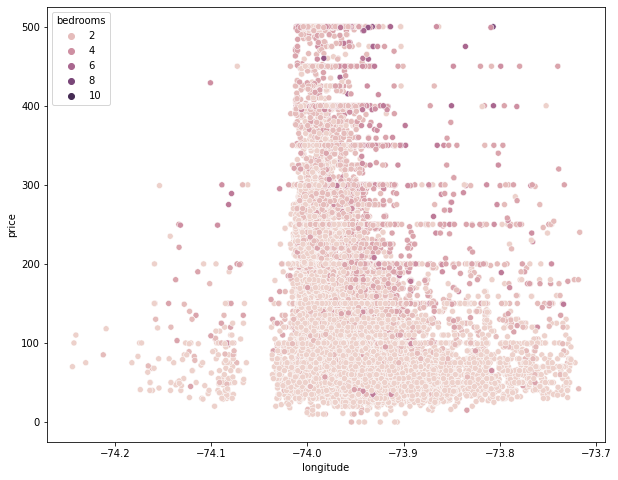

In [36]:
plt.figure(figsize = (10,8)) 

sns.scatterplot(x= listings['longitude'], y = listings['price'], hue = listings['bedrooms'])
plt.show()

Al parecer, la ubicación geográfica sí afecta el precio. Esto es peligroso, ya que puede ocurrir que la correlación entre variables esté siendo afectada por una **variable omitida**.

Recordemos que anteriormente encontramos que si el alojamiento tiene disponibilidad de parqueo resultó con correlación negativa para el precio:

In [37]:
# Correlación negativa por mayor valor
corr['price'][neg_cor].sort_values().head(10)

longitude                                      -0.294196
calculated_host_listings_count_private_rooms   -0.127504
calculated_host_listings_count_shared_rooms    -0.101389
host_greeting                                  -0.051356
number_of_reviews                              -0.029229
host_identity_verified                         -0.022861
parking                                        -0.019383
host_is_superhost                              -0.016325
number_of_reviews_ltm                          -0.011481
host_since                                     -0.009671
Name: price, dtype: float64

El sentido común nos diría lo contrario: la disponibilidad de parqueo debería ser positivo para el precio, ya que es una comodidad adicional. Exploremos qué ocurre realmente.

In [38]:
# Extrayendo la información geográfica de los lugares con parqueo y sin parqueo
lat_log_parking_yes = listings.loc[ listings['parking']==1.0, ["latitude","longitude" ] ]
lat_log_parking_no = listings.loc[ listings['parking']==-1.0, ["latitude","longitude" ] ]

# Creación del mapa básico
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=10,
                        tiles="OpenStreetMap")

# Añadiendo las primeras 1000 observaciones con parqueo
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_yes["latitude"].iloc[i],lat_log_parking_yes["longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)
    
# Añadiendo las primeras 1000 observaciones sin parqueo
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_no["latitude"].iloc[i],lat_log_parking_no["longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map) 
    
# Mostrando el mapa
folium_map

Podemos ver en el mapa que aquellos con parqueo tienen círculos azules y aquellos sin parqueo tienen círculos rojos. 

¡Al parecer sí hay una distribución geográfica de la disponibilidad de parqueo!

Más interesante aún: si recordamos cómo se distribuyen los precios, precisamente se encuentra que **aquellos lugares sin parqueo están en zonas que generalmente son más caras**.

Esto es un caso de la **Paradoja de Simpson**.


### 6.4.3. Paradoja de Simpson

La **Paradoja de Simpson** es un fenómeno probabilístico en el que una tendencia aparece en múltiples grupos de datos pero desaparece cuando esos grupos son combinados. Genera seriamente cuando intentamos inferir una relación causal de los datos que presentan este fenómeno.

<img  src="https://miro.medium.com/max/1400/1*HDi8HuaVrumdFP-W9e4PtA.png">

En ese sentido, una correlación puede parecer con un signo o tendencia particular, pero que en realidad tiene otra. La solución a este inconveniente es tomar en cuenta las variables necesarias, analizar bien el fenómeno y desagregar los datos cuando sea necesario.

En nuestro ejemplo, al parecer aquellos lugares que cuentan con disponibilidad de parqueo se encuentran por fuera de las zonas con altos precios. En este caso, hace falta diferenciar por **barrio** (`neighbourhood`), ya que es natural pensar que algunos barrios son más caros que otros. Esto es particularmente cierto para Nueva York, donde los barrios más deseados son altamente poblados donde no hay mucho espacio para parqueaderos y aquellos menos deseados son suburbios poco poblados.

Intentemos hacer un ejercicio para diferenciar por barrio.

In [40]:
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


In [42]:
temp = listings[listings['neighbourhood'] == x]

{}

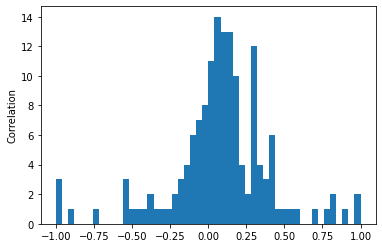

Average correlation:  0.08178058684472027


In [45]:
# Se obtienen los barrios
neighbourhoods = listings.neighbourhood.unique()

# Se crea un diccionario para tener las correlaciones por barrios
cvec = list()
cvec = dict()

# Se agrupa por barrios y se calcula la correlación
for x in neighbourhoods:
    temp = listings[listings['neighbourhood'] == x]
    cvec[x] = temp.corr()['price']['parking']
    
# Se guardan los resultados
res = list(cvec.values())

# Se borran aquellos que tienen missings
res = [x for x in res if str(x) != 'nan']

# Se organizan los datos
res.sort()

# Se hace un histograma
plt.hist(res, bins=50)
plt.ylabel('Correlation')
plt.show()

# Se obtiene la correlación promedio entre barrios
print('Average correlation: ', sum(res)/len(res))

Como podemos ver, al parecer la correlación del precio con la disponibilidad de parqueo es, en promedio y diferenciado por barrios, **positiva**. Estábamos en un caso de una **Paradoja de Simpson**.

Algunas otras notas sobre esto:

* En bastantes casos tener disponibilidad de parqueo pareciera no tener un efecto sobre el precio.
* En algunos casos es totalmente determinante, con correlaciones cercanas a 1 o -1.